### Cost Benefit Questions

1. How would you rephrase the business problem if your model was optimizing toward _precision_? i.e., How might the model behave differently, and what effect would it have?
2. How would you rephrase the business problem if your model was optimizing toward _recall_?
3. What would the most ideal model look like in this case?


### Visualizing models over variables

In [69]:
%matplotlib inline

In [70]:
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../../assets/dataset/flight_delays.csv')
df = df.loc[df.DEP_DEL15.notnull()].copy()

In [71]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,DEP_TIME,DEP_DEL15,Unnamed: 15
0,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,900,855.0,0.0,NaN
1,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,900,856.0,0.0,NaN
2,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,1230,1226.0,0.0,NaN
3,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,1220,1214.0,0.0,NaN
4,1,4,2015-01-01,AA,19805,AA,11298,1129803,30194,12173,1217302,32134,1305,1754.0,1.0,NaN


In [72]:
df = df[df.DEP_DEL15.notnull()]
df = df.join(pd.get_dummies(df['CARRIER'], prefix='carrier'))
df = df.join(pd.get_dummies(df['DAY_OF_WEEK'], prefix='dow'))
model = lm.LogisticRegression()
features = [i for i in df.columns if 'dow_' in i]

In [73]:
df.shape

(458311, 37)

In [74]:
features += ['CRS_DEP_TIME']
model.fit(df[features[1:]], df['DEP_DEL15'])

df['probability'] = model.predict_proba(df[features[1:]]).T[1]

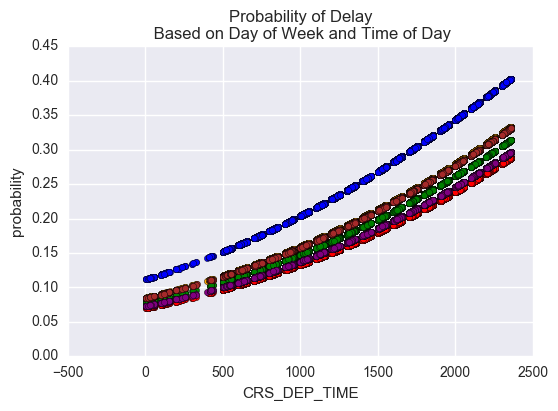

In [75]:
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(x='CRS_DEP_TIME', y='probability', kind='scatter', color = c, ax=ax)

ax.set(title='Probability of Delay\n Based on Day of Week and Time of Day')


### Other Answers: visualizing Airline or the inverse

In [76]:
print features[0]

dow_1


In [77]:
df.groupby("CARRIER").describe() 

AIRLINE_ID  CRS_DEP_TIME  DAY_OF_MONTH   DAY_OF_WEEK  \
CARRIER                                                               
AA      count     43173.0  43173.000000  43173.000000  43173.000000   
        mean      19805.0   1322.204387     15.793714      4.097978   
        std           0.0    476.831738      8.935966      1.939495   
        min       19805.0      5.000000      1.000000      1.000000   
        25%       19805.0    915.000000      8.000000      2.000000   
        50%       19805.0   1315.000000     16.000000      4.000000   
        75%       19805.0   1720.000000     23.000000      6.000000   
        max       19805.0   2355.000000     31.000000      7.000000   
AS      count     13198.0  13198.000000  13198.000000  13198.000000   
        mean      19930.0   1324.201167     15.816033      4.120170   
        std           0.0    506.447874      8.994418      1.935017   
        min       19930.0      5.000000      1.000000      1.000000   
        25%       19930.0    905.000000      8.000000      2.000000   
        50%       19930.0   1320.000000     16.000000      4.000000   
        75%       19930.0   1745.000000     24.000000      6.000000   
        max       19930.0   2355.000000     31.000000      7.000000   
B6      count     20531.0  20531.000000  20531.000000  20531.000000   
        mean      20409.0   1357.818811     15.236520      4.174809   
        std           0.0    509.670404      8.885787      1.924787   
        min       20409.0    155.000000      1.000000      1.000000   
        25%       20409.0    908.000000      8.000000      3.000000   
        50%       20409.0   1340.000000     15.000000      4.000000   
        75%       20409.0   1815.000000     22.000000      6.000000   
        max       20409.0   2359.000000     31.000000      7.000000   
DL      count     63752.0  63752.000000  63752.000000  63752.000000   
        mean      19790.0   1317.296257     15.926355      4.022807   
        std           0.0    471.508621      8.863587      1.933730   
        min       19790.0     15.000000      1.000000      1.000000   
        25%       19790.0    914.000000      8.000000      2.000000   
        50%       19790.0   1315.000000     16.000000      4.000000   
...                   ...           ...           ...           ...   
UA      std           0.0    464.985935      8.942552      1.915352   
        min       19977.0      5.000000      1.000000      1.000000   
        25%       19977.0    902.000000      8.000000      2.000000   
        50%       19977.0   1300.000000     15.000000      4.000000   
        75%       19977.0   1700.000000     23.000000      6.000000   
        max       19977.0   2359.000000     31.000000      7.000000   
US      count     32552.0  32552.000000  32552.000000  32552.000000   
        mean      20355.0   1317.001352     15.725209      4.117289   
        std           0.0    486.072339      8.923042      1.908768   
        min       20355.0     10.000000      1.000000      1.000000   
        25%       20355.0    930.000000      8.000000      3.000000   
        50%       20355.0   1314.000000     16.000000      4.000000   
        75%       20355.0   1730.000000     23.000000      6.000000   
        max       20355.0   2359.000000     31.000000      7.000000   
VX      count      4651.0   4651.000000   4651.000000   4651.000000   
        mean      21171.0   1348.460976     15.543109      4.079553   
        std           0.0    457.971326      8.940209      1.933884   
        min       21171.0    630.000000      1.000000      1.000000   
        25%       21171.0    915.000000      8.000000      2.000000   
        50%       21171.0   1330.000000     15.000000      4.000000   
        75%       21171.0   1720.000000     23.000000      6.000000   
        max       21171.0   2355.000000     31.000000      7.000000   
WN      count     98307.0  98307.000000  98307.000000  98307.000000   
        mean      19393.0   1332.223087

In [78]:
#this lets you see your data and see who has the most delays

df.groupby("CARRIER").apply( lambda group: len(group) )

CARRIER
AA    43173
AS    13198
B6    20531
DL    63752
EV    48267
F9     6745
HA     6418
MQ    27670
NK     8647
OO    46946
UA    37454
US    32552
VX     4651
WN    98307
dtype: int64

In [79]:
features = [i for i in df.columns if 'carrier_' in i]
features += ['CRS_DEP_TIME']

model.fit(df[features[1:]], df['DEP_DEL15'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

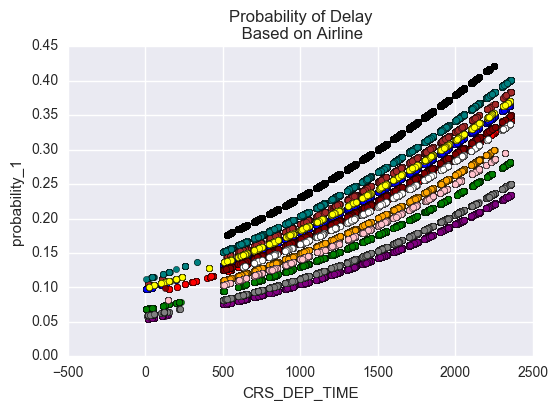

In [80]:
df['probability_1'] = model.predict_proba(df[features[1:]]).T[1]
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'black', 'yellow', 'maroon','teal','gray','white']
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(x='CRS_DEP_TIME', y='probability_1', kind='scatter', color = c, ax=ax)
ax.set(title='Probability of Delay\n Based on Airline')

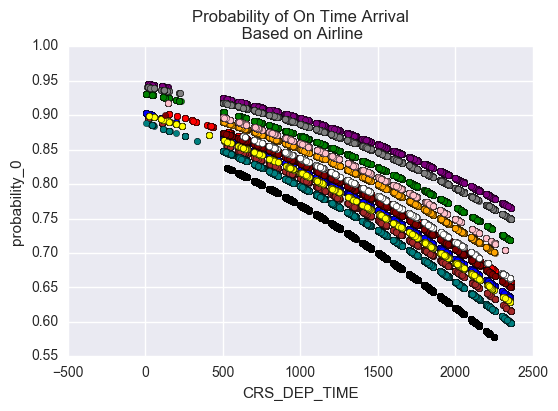

In [81]:
df['probability_0'] = model.predict_proba(df[features[1:]]).T[0]
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'black', 'yellow', 'maroon','teal','gray','white']
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(x='CRS_DEP_TIME', y='probability_0', kind='scatter', color = c, ax=ax)
ax.set(title='Probability of On Time Arrival\n Based on Airline')

### Visualizing Performance Against Baseline

#### Visualizing AUC and comparing Models

In [82]:
from sklearn import dummy, metrics

In [83]:
model0 = dummy.DummyClassifier()
model0.fit(df[features[1:]], df['DEP_DEL15'])
df['probability_0'] = model0.predict_proba(df[features[1:]]).T[1]

model1 = lm.LogisticRegression()
model.fit(df[features[1:]], df['DEP_DEL15'])
df['probability_1'] = model.predict_proba(df[features[1:]]).T[1]


In [84]:
df.shape

(458311, 40)

[(0, 1),
 (0, 1),

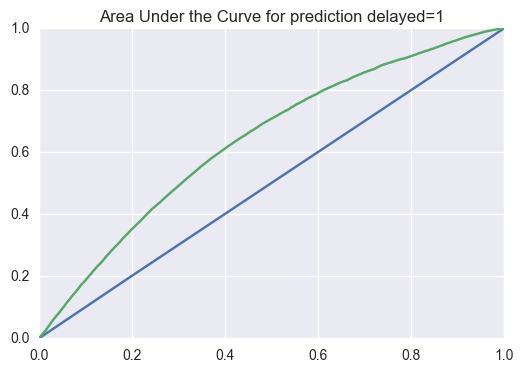

In [85]:
ax = plt.subplot(111)
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_0)
ax.plot(vals[0], vals[1])
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_1)
ax.plot(vals[0], vals[1])

ax.set(title='Area Under the Curve for prediction delayed=1', ylabel='', xlabel='', xlim=(0, 1), ylim=(0, 1))

In [90]:
df['prediction'] = model.predict(df[features[1:]])

In [91]:
metrics.accuracy_score(df.DEP_DEL15, df.prediction) 

0.80149287274361736

In [ ]:
# Area under ROC curve (above) is the accuracy.

#### Visualizing Precision / Recall

In [93]:
df["prediction"] = model.predict(df(features[1:]))

TypeError: 'DataFrame' object is not callable

In [92]:
metrics.classification_report(df.DEP_DEL15, df.prediction)

print metrics.classification_report(df.DEP_DEL15, df.prediction)

             precision    recall  f1-score   support

        0.0       0.80      1.00      0.89    367333
        1.0       0.00      0.00      0.00     90978

avg / total       0.64      0.80      0.71    458311

